In [23]:
# Dependencies
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
sel = [Measurement.date, 
       Measurement.tobs]
results = session.query(*sel).\
    filter(func.strftime("%m", Measurement.date) == "06").\
    order_by(Measurement.date)
results

In [5]:
#  3. Convert the June temperatures to a list.
june_temps = results.all()
june_temps

[('2010-06-01', 78.0),
 ('2010-06-01', 74.0),
 ('2010-06-01', 73.0),
 ('2010-06-01', 77.0),
 ('2010-06-01', 69.0),
 ('2010-06-01', 76.0),
 ('2010-06-01', 71.0),
 ('2010-06-01', 74.0),
 ('2010-06-01', 70.0),
 ('2010-06-02', 76.0),
 ('2010-06-02', 76.0),
 ('2010-06-02', 72.0),
 ('2010-06-02', 76.0),
 ('2010-06-02', 70.0),
 ('2010-06-02', 76.0),
 ('2010-06-02', 71.0),
 ('2010-06-02', 76.0),
 ('2010-06-02', 78.0),
 ('2010-06-03', 78.0),
 ('2010-06-03', 75.0),
 ('2010-06-03', 74.0),
 ('2010-06-03', 77.0),
 ('2010-06-03', 67.0),
 ('2010-06-03', 76.0),
 ('2010-06-03', 72.0),
 ('2010-06-03', 78.0),
 ('2010-06-03', 73.0),
 ('2010-06-04', 76.0),
 ('2010-06-04', 75.0),
 ('2010-06-04', 73.0),
 ('2010-06-04', 75.0),
 ('2010-06-04', 70.0),
 ('2010-06-04', 73.0),
 ('2010-06-04', 72.0),
 ('2010-06-04', 74.0),
 ('2010-06-04', 68.0),
 ('2010-06-05', 77.0),
 ('2010-06-05', 74.0),
 ('2010-06-05', 72.0),
 ('2010-06-05', 73.0),
 ('2010-06-05', 78.0),
 ('2010-06-05', 76.0),
 ('2010-06-05', 79.0),
 ('2010-06-

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_temps, columns=['date','June Temps'])
print(june_df)

            date  June Temps
0     2010-06-01        78.0
1     2010-06-01        74.0
2     2010-06-01        73.0
3     2010-06-01        77.0
4     2010-06-01        69.0
...          ...         ...
1695  2017-06-30        81.0
1696  2017-06-30        74.0
1697  2017-06-30        75.0
1698  2017-06-30        76.0
1699  2017-06-30        75.0

[1700 rows x 2 columns]


In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
sel = [Measurement.date, 
       Measurement.tobs]
dec_results = session.query(*sel).\
    filter(func.strftime("%m", Measurement.date) == "12").\
    order_by(Measurement.date)
dec_results

In [9]:
# 7. Convert the December temperatures to a list.
dec_temps = dec_results.all()
dec_temps

[('2010-12-01', 76.0),
 ('2010-12-01', 73.0),
 ('2010-12-01', 73.0),
 ('2010-12-01', 72.0),
 ('2010-12-01', 78.0),
 ('2010-12-01', 72.0),
 ('2010-12-01', 70.0),
 ('2010-12-01', 71.0),
 ('2010-12-02', 72.0),
 ('2010-12-02', 73.0),
 ('2010-12-02', 75.0),
 ('2010-12-02', 71.0),
 ('2010-12-02', 74.0),
 ('2010-12-02', 71.0),
 ('2010-12-02', 74.0),
 ('2010-12-02', 70.0),
 ('2010-12-03', 74.0),
 ('2010-12-03', 73.0),
 ('2010-12-03', 71.0),
 ('2010-12-03', 70.0),
 ('2010-12-03', 74.0),
 ('2010-12-03', 72.0),
 ('2010-12-03', 74.0),
 ('2010-12-03', 67.0),
 ('2010-12-04', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-04', 72.0),
 ('2010-12-04', 78.0),
 ('2010-12-04', 74.0),
 ('2010-12-04', 75.0),
 ('2010-12-04', 77.0),
 ('2010-12-05', 73.0),
 ('2010-12-05', 71.0),
 ('2010-12-05', 73.0),
 ('2010-12-05', 78.0),
 ('2010-12-05', 66.0),
 ('2010-12-05', 69.0),
 ('2010-12-05', 69.0),
 ('2010-12-06', 64.0),
 ('2010-12-06', 66.0),
 ('2010-12-06', 64.0),
 ('2010-12-06', 66.0),
 ('2010-12-06', 78.0),
 ('2010-12-

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_df = pd.DataFrame(dec_results, columns=['date','December Temps'])

print(december_df)

            date  December Temps
0     2010-12-01            76.0
1     2010-12-01            73.0
2     2010-12-01            73.0
3     2010-12-01            72.0
4     2010-12-01            78.0
...          ...             ...
1512  2016-12-31            66.0
1513  2016-12-31            71.0
1514  2016-12-31            72.0
1515  2016-12-31            67.0
1516  2016-12-31            65.0

[1517 rows x 2 columns]


In [11]:
# 9. Calculate and print out the summary statistics for the December temperature DataFrame.
december_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


# D3: Two additional Queries for Analysis

In [12]:
# 1) Query precipitation data for the month of June
sel = [Measurement.date, 
       Measurement.prcp]
prcp_results = session.query(*sel).\
    filter(func.strftime("%m", Measurement.date) == "06").\
    order_by(Measurement.date).all()
prcp_results

[('2010-06-01', 0.0),
 ('2010-06-01', 0.03),
 ('2010-06-01', 0.01),
 ('2010-06-01', 0.0),
 ('2010-06-01', None),
 ('2010-06-01', 0.03),
 ('2010-06-01', 0.0),
 ('2010-06-01', 0.0),
 ('2010-06-01', 0.08),
 ('2010-06-02', 0.01),
 ('2010-06-02', 0.0),
 ('2010-06-02', 0.0),
 ('2010-06-02', 0.0),
 ('2010-06-02', 0.03),
 ('2010-06-02', 0.0),
 ('2010-06-02', 0.03),
 ('2010-06-02', 0.0),
 ('2010-06-02', 0.0),
 ('2010-06-03', 0.0),
 ('2010-06-03', 0.0),
 ('2010-06-03', 0.0),
 ('2010-06-03', 0.14),
 ('2010-06-03', 0.0),
 ('2010-06-03', 0.0),
 ('2010-06-03', 0.0),
 ('2010-06-03', 0.0),
 ('2010-06-03', 0.1),
 ('2010-06-04', 0.0),
 ('2010-06-04', 0.0),
 ('2010-06-04', 0.0),
 ('2010-06-04', 0.0),
 ('2010-06-04', 0.0),
 ('2010-06-04', 0.0),
 ('2010-06-04', 0.0),
 ('2010-06-04', 0.0),
 ('2010-06-04', 0.01),
 ('2010-06-05', 0.0),
 ('2010-06-05', 0.0),
 ('2010-06-05', 0.0),
 ('2010-06-05', 0.0),
 ('2010-06-05', 0.0),
 ('2010-06-05', 0.0),
 ('2010-06-05', 0.0),
 ('2010-06-05', 0.09),
 ('2010-06-06', 0.0),

In [13]:
# Create dataframe for precipitation in the month of June
june_prcp_df = pd.DataFrame(prcp_results, columns=['date','June Precipitation'])

print(june_prcp_df)

            date  June Precipitation
0     2010-06-01                0.00
1     2010-06-01                0.03
2     2010-06-01                0.01
3     2010-06-01                0.00
4     2010-06-01                 NaN
...          ...                 ...
1695  2017-06-30                0.00
1696  2017-06-30                0.12
1697  2017-06-30                0.07
1698  2017-06-30                0.01
1699  2017-06-30                0.20

[1700 rows x 2 columns]


In [14]:
# Print summary statistics for precipitation in the month of June
june_prcp_df.describe()

,June Precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [15]:
# 2) Query precipitation data from the month of December
sel = [Measurement.date, 
       Measurement.prcp]
results_dec = session.query(*sel).\
    filter(func.strftime("%m", Measurement.date) == "12").\
    order_by(Measurement.date).all()
results_dec

[('2010-12-01', 0.04),
 ('2010-12-01', 0.76),
 ('2010-12-01', 0.03),
 ('2010-12-01', 0.7),
 ('2010-12-01', 0.03),
 ('2010-12-01', 1.35),
 ('2010-12-01', 0.13),
 ('2010-12-01', 1.48),
 ('2010-12-02', 0.13),
 ('2010-12-02', 0.06),
 ('2010-12-02', 0.26),
 ('2010-12-02', None),
 ('2010-12-02', 0.02),
 ('2010-12-02', 0.16),
 ('2010-12-02', 0.0),
 ('2010-12-02', 0.18),
 ('2010-12-03', 0.0),
 ('2010-12-03', 0.16),
 ('2010-12-03', 0.22),
 ('2010-12-03', 0.78),
 ('2010-12-03', 0.01),
 ('2010-12-03', 0.47),
 ('2010-12-03', 0.01),
 ('2010-12-03', 1.59),
 ('2010-12-04', 0.0),
 ('2010-12-04', 0.0),
 ('2010-12-04', 0.0),
 ('2010-12-04', 0.0),
 ('2010-12-04', 0.0),
 ('2010-12-04', 0.0),
 ('2010-12-04', 0.19),
 ('2010-12-05', 0.0),
 ('2010-12-05', 0.0),
 ('2010-12-05', None),
 ('2010-12-05', 0.0),
 ('2010-12-05', 0.0),
 ('2010-12-05', 0.0),
 ('2010-12-05', 0.0),
 ('2010-12-06', 0.0),
 ('2010-12-06', 0.0),
 ('2010-12-06', 0.0),
 ('2010-12-06', 0.0),
 ('2010-12-06', 0.02),
 ('2010-12-06', 0.0),
 ('2010-

In [16]:
# Create dataframe for precipitation in the month of December
dec_prcp_df = pd.DataFrame(results_dec, columns=['date','December Precipitation'])

print(dec_prcp_df)

            date  December Precipitation
0     2010-12-01                    0.04
1     2010-12-01                    0.76
2     2010-12-01                    0.03
3     2010-12-01                    0.70
4     2010-12-01                    0.03
...          ...                     ...
1512  2016-12-31                    0.01
1513  2016-12-31                    0.62
1514  2016-12-31                    0.36
1515  2016-12-31                    0.25
1516  2016-12-31                    0.90

[1517 rows x 2 columns]


In [17]:
# Print summary statistics for precipitation in the month of December
dec_prcp_df.describe()

,December Precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


In [20]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [19]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

     tobs
0    71.0
1    71.0
2    72.0
3    72.0
4    76.0
..    ...
231  73.0
232  76.0
233  77.0
234  76.0
235  76.0

[236 rows x 1 columns]


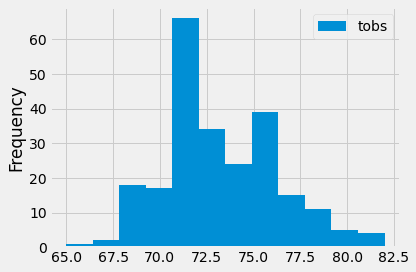

In [24]:
# Choose the station with the highest number of temperature observations.
# Query June temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(func.strftime("%m", Measurement.date) == "06").all()
df = pd.DataFrame(results, columns=['tobs'])
print(df)
#print(df.to_string(index=False))
df.plot.hist(bins=12)
plt.tight_layout()

     prcp
0    0.00
1    0.03
2    0.00
3    0.00
4    0.00
..    ...
231  0.06
232  0.01
233  0.00
234  0.00
235  0.01

[236 rows x 1 columns]


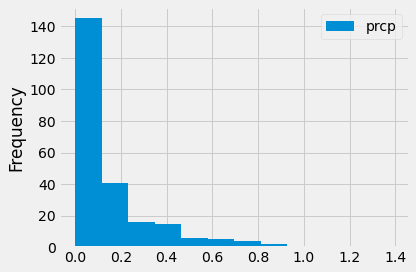

In [28]:
# Query June precipitation observation data for this station and plot the results as a histogram
results = session.query(Measurement.prcp).\
filter(Measurement.station == 'USC00519281').\
filter(func.strftime("%m", Measurement.date) == "06").all()
df = pd.DataFrame(results, columns=['prcp'])
print(df)
#print(df.to_string(index=False))
df.plot.hist(bins=12)
plt.tight_layout()

     tobs
0    72.0
1    71.0
2    72.0
3    74.0
4    66.0
..    ...
212  71.0
213  72.0
214  74.0
215  69.0
216  67.0

[217 rows x 1 columns]


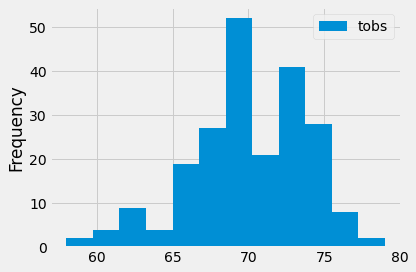

In [25]:
# Choose the station with the highest number of temperature observations.
# Query December temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(func.strftime("%m", Measurement.date) == "12").all()
df = pd.DataFrame(results, columns=['tobs'])
print(df)
#print(df.to_string(index=False))
df.plot.hist(bins=12)
plt.tight_layout()

     prcp
0    1.35
1    0.16
2    0.47
3    0.00
4    0.00
..    ...
212  0.05
213  0.09
214  0.52
215  0.29
216  0.25

[217 rows x 1 columns]


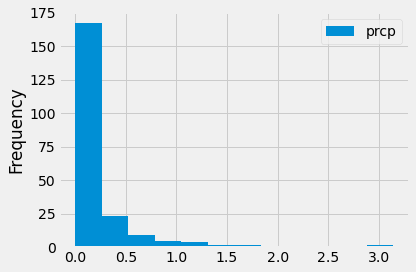

In [29]:
# Query December precipitation observation data for this station and plot the results as a histogram
results = session.query(Measurement.prcp).\
filter(Measurement.station == 'USC00519281').\
filter(func.strftime("%m", Measurement.date) == "12").all()
df = pd.DataFrame(results, columns=['prcp'])
print(df)
#print(df.to_string(index=False))
df.plot.hist(bins=12)
plt.tight_layout()